# Tutorial - wykres pudełkowy (z biblioteką Seaborn)

Wykres pudełkowy pozwala na graficzne przedstawienie rozkładu cechy statystycznej. W prostych słowach pozwala na przedstawienie pełnego zakresu populacji od minimum do maksimum z oznaczonymi kwartylami oraz medianą. 

Wykres pudełkowy reprezentowany jest przez pudełko z wąsami. Pudełko określa przedział pomiędzy pierwszym, a trzecim kwartylem. Pozioma linia w jego środku wskazuje medianę. Wąsy wskazują minimalną oraz maksymalną wartość. Każde punkty poza wąsami są wartościami odstającymi.

Aby najlepiej wykorzystać potencjał wykresów pudełkowych, warto jest posiadać wiedzę statystyczną. Podstawową wiedzę na ten temat można zdobyć m.in. korzystając ze strony:
https://www.statystyka-zadania.pl/wykres-pudelkowy/

W tym tutorialu zostaną przedstawione metody tworzenia wykresów pudełkowych w języku Python.

## Biblioteki oraz dane

Wczytane zostaną biblioteki oraz przykładowe dane użyte w tutorialu.

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [30]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

df= pd.read_csv("iris.csv")

## Wykres pudełkowy z biblioteką Seaborn

W tutorialu zostanie wykorzystana głównie biblioteka Seaborn. Na początku zostaną przedstawione podstawowe wykresy pudełkowe. W następnej sekcji dotyczącej personalizacji wykresu wyjaśni jak poprawić czytelność i estetykę wykresu.

### Podstawy

Poniżej przedstawiony został najbardziej podstawowy przykład wykresu boxplot z jedną zmienną, gdzie parametrami są:
- data - dane
- x, y - nazwy zmiennych

Tutaj korzystamy z wcześniej wczytanego zbioru danych iris nazwanego df oraz jednej zmiennej y sepal.length.

In [31]:
sns.boxplot(data=df, y='sepal.length')

<AxesSubplot:ylabel='sepal.length'>

Poprzedni wykres był ogólny dla wszystkich garunków irysa. Jeśli chcemy sprawdzić jak wygląda wykres pudełkowy dla poszczególnych gatunków, możemy zrobić to poprzez dodanie zmiennej variety w parametrze x. 

In [32]:
sns.boxplot(data=df, x='variety',y='sepal.length')

<AxesSubplot:xlabel='variety', ylabel='sepal.length'>

Jeśli chcemy, aby wykres pudełkowy był wyświetlony horyzontalnie, możemy zamienić wartości parametrów x oraz y.

In [33]:
sns.boxplot(data=df, x='sepal.length',y='variety')

<AxesSubplot:xlabel='sepal.length', ylabel='variety'>

### Personalizacja wykresu

Aby wykres był czytelny, warto dodać pewne parametry, które umożliwią innym osobom natychmiastową wiedzę, czego ów wykres dotyczy. Aby dodać podpis należy użyć funkcji title (używając interfejsu pyplot z biblioteki matplotlib). Podpisy do osi mogą być dodane dzięki funkcji set(xlabel,ylabel), gdzie parametry oznaczają odpowiednio podpis do osi x i y. 

Gdy używamy plt, po ukończeniu wszystkich modyfikacji należy dodać plt.show().

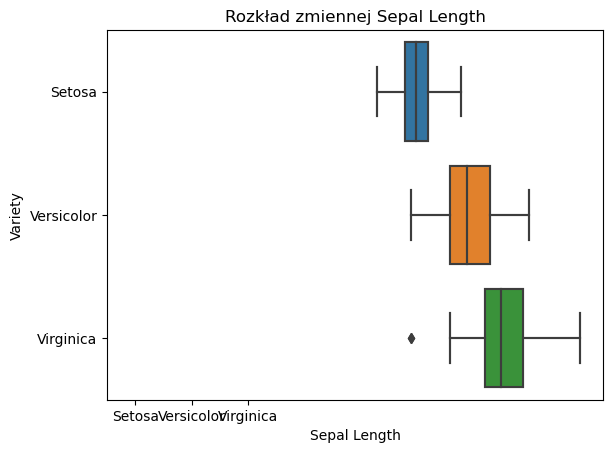

In [34]:
plt.title('Rozkład zmiennej Sepal Length')
sns.boxplot(data=df, x='sepal.length',y='variety').set(xlabel='Sepal Length', ylabel='Variety')
plt.show()

Jeśli chcemy zmienić rozmiar wykresu, możemy również z korzystać z interfejsu pyplot.

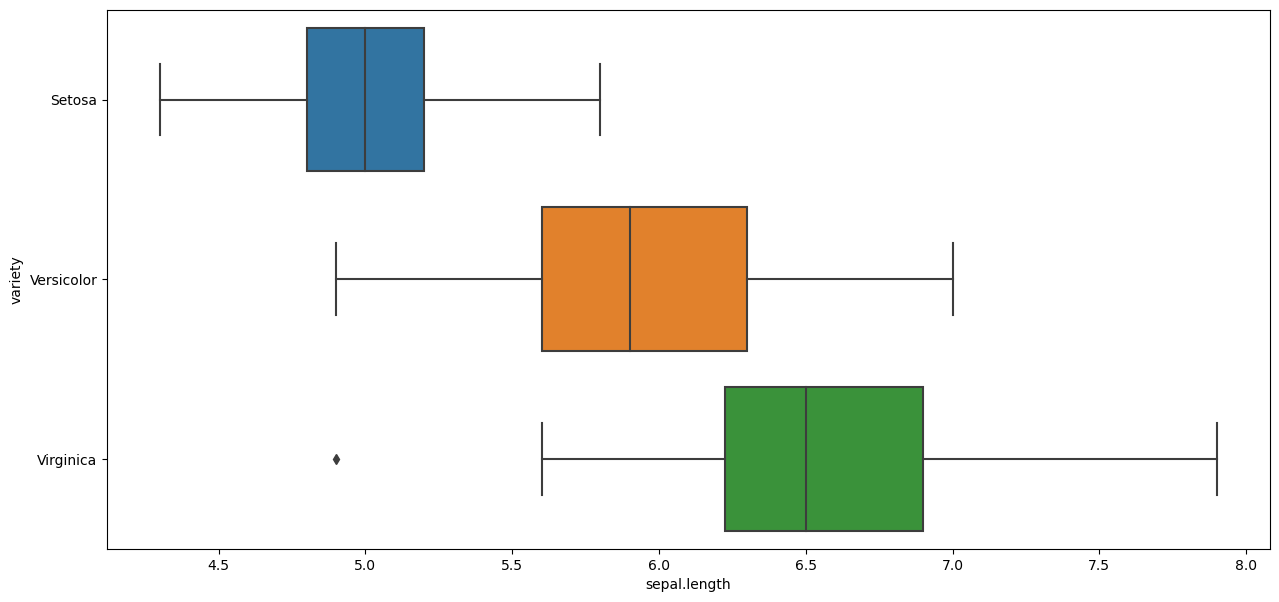

In [35]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(data=df, x='sepal.length',y='variety')
plt.show()

# resetowanie rozmiaru generowanych wykresu do opcji domyślnych
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

Opcjami estetycznymi są zmiany kolorów. Możemy wybrać kolor z listy:

https://matplotlib.org/2.0.2/examples/color/named_colors.html

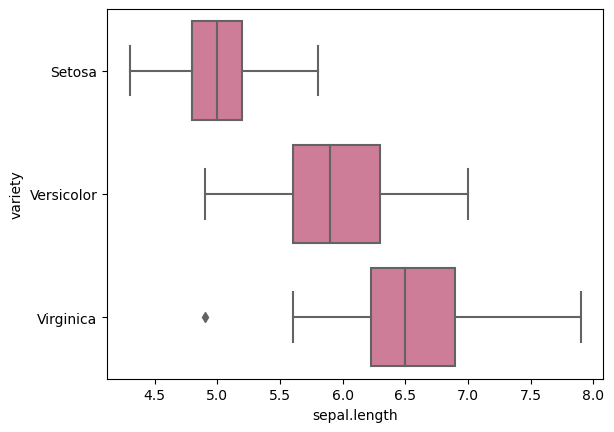

In [36]:
sns.boxplot(data=df, x='sepal.length',y='variety', color='palevioletred')
plt.show()

Możemy również skorzystać z gotowych palet:
    
https://seaborn.pydata.org/tutorial/color_palettes.html

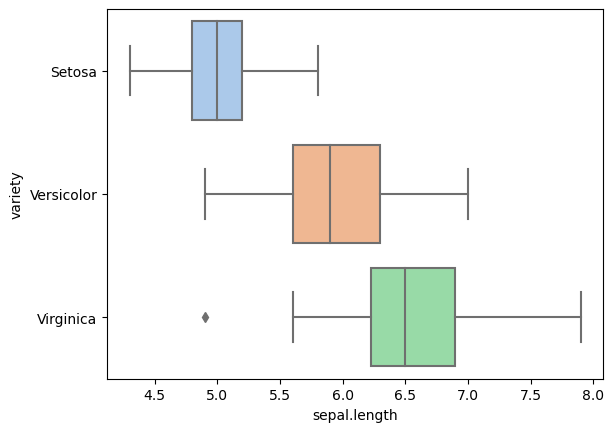

In [37]:
sns.boxplot(data=df, x='sepal.length',y='variety', palette='pastel')
plt.show()

Wcięcie (notch) wokół średniej reprezentuje przedział ufności dla średniej.

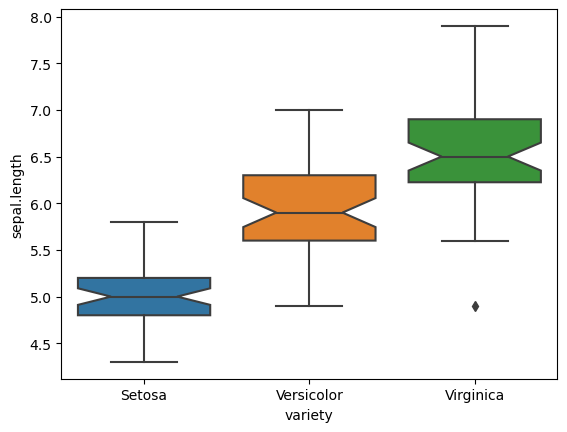

In [38]:
sns.boxplot(x="variety", y="sepal.length", data=df, notch=True) 
plt.show()

Jeśli chcemy ukryć wartości odstające, oznaczamy parametr showfliers jako False.

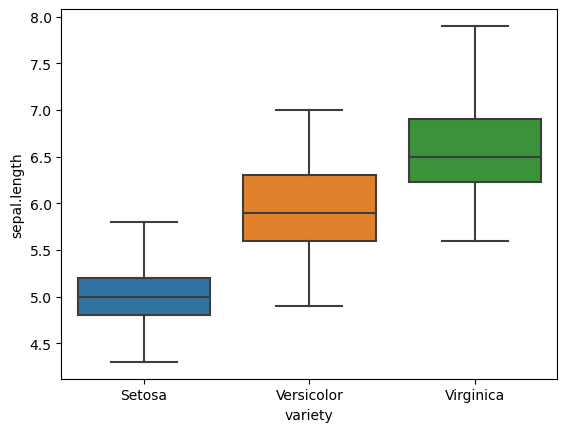

In [39]:
sns.boxplot(x="variety", y="sepal.length", data=df, showfliers=False)
plt.show()

## Podobne wykresy

W ramach ciekawostki, istnieją również wykresy alternatywne od wykresów pudełkowych (jednak różniące się od nich). Wykres skrzypcowy jest przydatny, gdy chcemy odczytać nie tylko informacje na temat poszczególnych kwantyli, ale zobaczyć, jak wygląda estymator jądrowy gęstości. W skrócie wykres skrzypcowy przypomina nieco wykres pudełkowy połączony z histogramem.

Dwa rodzaje wykresów punktowych stripplot oraz swarmplot reprezentują implementację wykresu punktowego dla zmiennej kategorycznej, czyli oba pokazują dokładnie wewnętrzną strukturę rozkładu, w szczególności jego wielkość próby i położenie poszczególnych obserwacji. Główna różnica polega na tym, że w wykresie roju dane punkty nie nachodzą na siebie i są dostosowane wzdłuż osi kategorycznej. Z drugiej strony, problem nakładania się punktów na wykresie kropkowym można częściowo naprawić przez ustawienie parametru alfa, który reguluje przezroczystość punktów. 

W wykresie stripplot punkty są przedstawione wzdłuż osi kategorii i mogą na siebie nachodzić, co czasami utrudnia interpretację wyników. Natomiast na wykresie swarmplot punkty są ułożone w taki sposób, aby nie nakładały się na siebie, co ułatwia analizę danych. Jednak wykres swarmplot może stać się trudny do odczytania, gdy próbka jest bardzo duża lub gdy zmienne kategoryczne mają dużo unikalnych wartości.


### violinplot

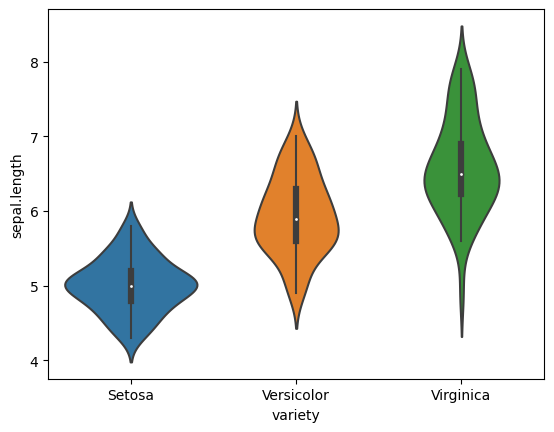

In [40]:
sns.violinplot(data=df, x='variety',y='sepal.length')
plt.show()

### stripplot

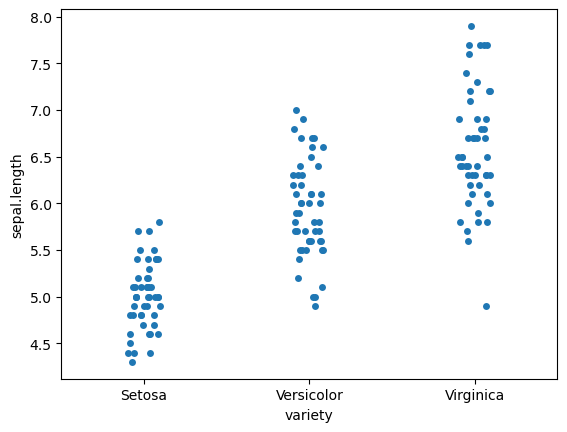

In [41]:
sns.stripplot(data=df, x='variety',y='sepal.length')
plt.show()

### swarmplot

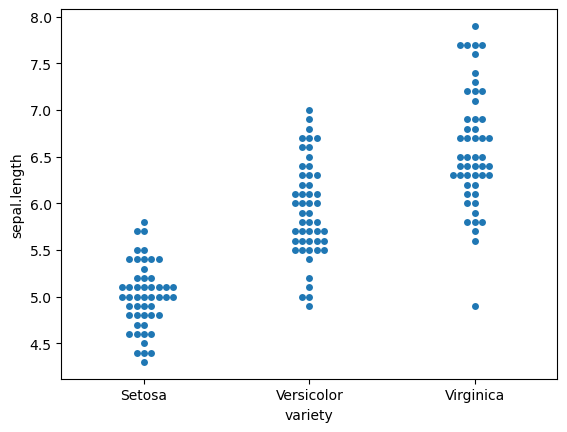

In [42]:
sns.swarmplot(data=df, x='variety',y='sepal.length')
plt.show()

Istnieją też różne wykresy będące hybrydami powyższych, np. raincloudplot, o którym można przeczytać tutaj: https://towardsdatascience.com/violin-strip-swarm-and-raincloud-plots-in-python-as-better-sometimes-alternatives-to-a-boxplot-15019bdff8f8.















































## Wskazówki

- zawsze można wyciągnąć dane z wykresu pudełkowego, aby dowiedzieć się, jakie są wartości liczbowe dla różnych jego części,

- wykres pudełkowy jest świetnym sposobem na wizualizację i podsumowanie rozkładu zmiennej. Jednakże ukrywa on prawdziwą dystrybucję i wielkość próbki,

- określenie skali i zakresu jest ważne dla czytelności wykresu. Należy upewnić się, że skala i zakres danych są odpowiednie. Jeśli dane mają skrajne wartości, takie jak wartości odstające, należy rozważyć ukrycie ich na wykresie, użycie skali logarytmicznej lub obcięcie osi, aby skupić się na większej części danych czy nie przegapić istoty problemu nieczytelnym wykresem,

- warto jest wyraźnie oznaczać osie, używając przy tym odpowiednich jednostek. Wykres powinien być atrakcyjny wizualnie i łatwy do odczytania. Ważne jest odpowiednie dobranie kolorów, ustawienia, podpisów i legendy, aby każdy kto spojrzy na wykres mógł szybko zrozumieć co chcemy przekazać. Oczywiście nie należy też obniżać czytelności wykresów nadmiernym jego "upiększaniem",

- wnioski z wykresów powinny być dobrze opisane i jeśli istnieje taka potrzeba to poparte dodatkowymi obliczeniami,

- wykres pudełkowy może być przydatny przy analizie różnic między grupami. Jednym z narzędzi, które mogą potwierdzić statystycznie znaczące różnice, są testy statystyczne, takie jak test T-Studenta lub test Wilcoxona. 

Wykres pudełkowy jest świetnym sposobem na podsumowanie rozkładu zmiennej. Jednak bez odpowiedniej wiedzy może zmienić się z przydatnego na wprowadzający w błąd lub czasem nawet niepotrzebny w danym zadaniu. Dlatego, aby uniknąć błędnych interpretacji lub wybrania nieodpowiedniego wykresu warto zapoznać się z pojęciami statystyki oraz być świadomym różnorodności wykresów i ich przypadków użycia.

Źródła:

https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/

https://bulldogjob.pl/readme/jak-tworzyc-wykresy-pudelkowe

https://aiaspirant.com/box-plot/

https://www.python-graph-gallery.com/boxplot/

https://towardsdatascience.com/violin-strip-swarm-and-raincloud-plots-in-python-as-better-sometimes-alternatives-to-a-boxplot-15019bdff8f8

https://www.statystyczny.pl/wykres-skrzypcowy/